国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。

主要开发者分布国家：
country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Canada             58600
Netherlands        52367
Czechia            48122
Japan              46553
Switzerland        38093
Name: count, dtype: int64


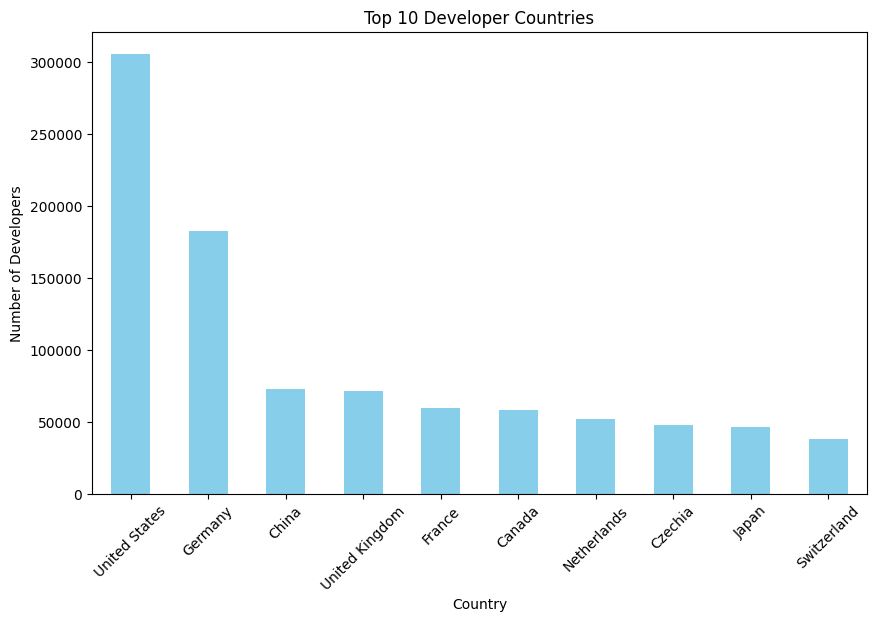

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/caolu/Desktop/users_combined_info_500.csv")

country_dist = df['country'].value_counts()

# 输出前10的国家
print("主要开发者分布国家：")
print(country_dist.head(10))

# 可视化
plt.figure(figsize=(10, 6))
country_dist.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Developer Countries")
plt.xlabel("Country")
plt.ylabel("Number of Developers")
plt.xticks(rotation=45)
plt.show()

分析主要城市的开发者密度，发现技术热点区域。

主要技术热点城市：
location
Germany          107747
Prague            37757
Japan             26986
Palo Alto, CA     19215
UK                17789
NYC               16381
San Francisco     16271
Paris, France     16021
Switzerland       15555
Houston, TX       15449
Name: count, dtype: int64


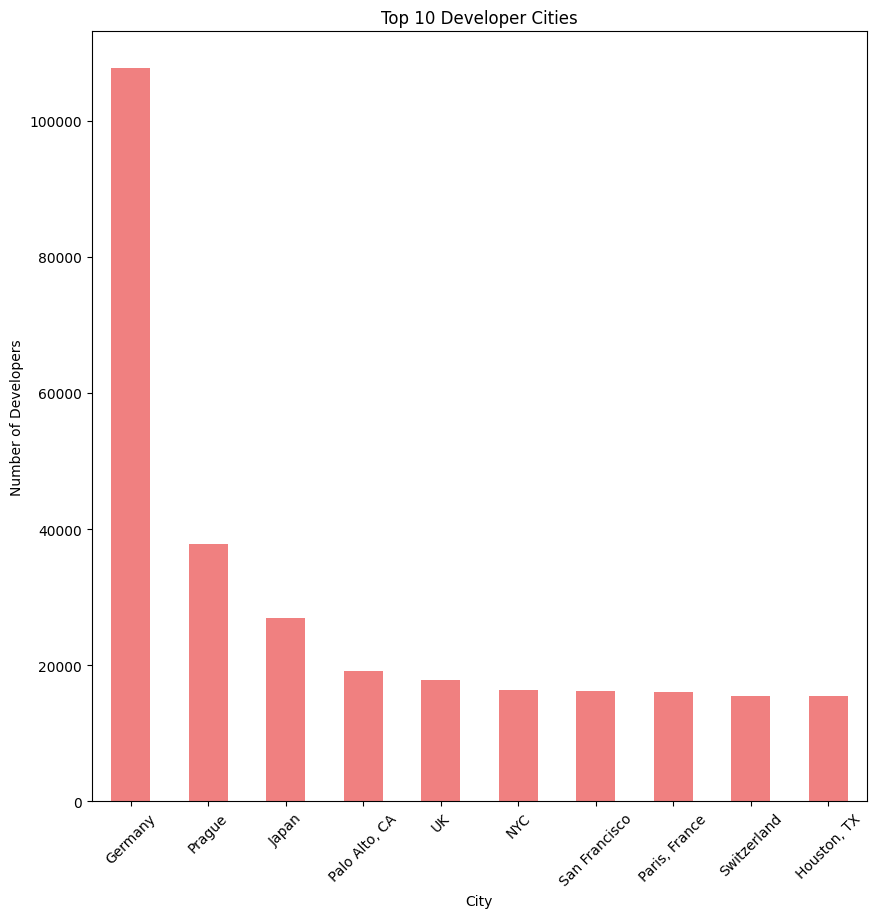

In [2]:
# 城市分布统计
city_dist = df['location'].value_counts()

# 输出前10的城市
print("主要技术热点城市：")
print(city_dist.head(10))

# 可视化
plt.figure(figsize=(10, 10))
city_dist.head(10).plot(kind='bar', color='lightcoral')
plt.title("Top 10 Developer Cities")
plt.xlabel("City")
plt.ylabel("Number of Developers")
plt.xticks(rotation=45)
plt.show()

了解用户的时区分布，分析不同地区用户的协作时间模式。

时区分布：
timezone
UTC+08:00    1294776
Name: count, dtype: int64


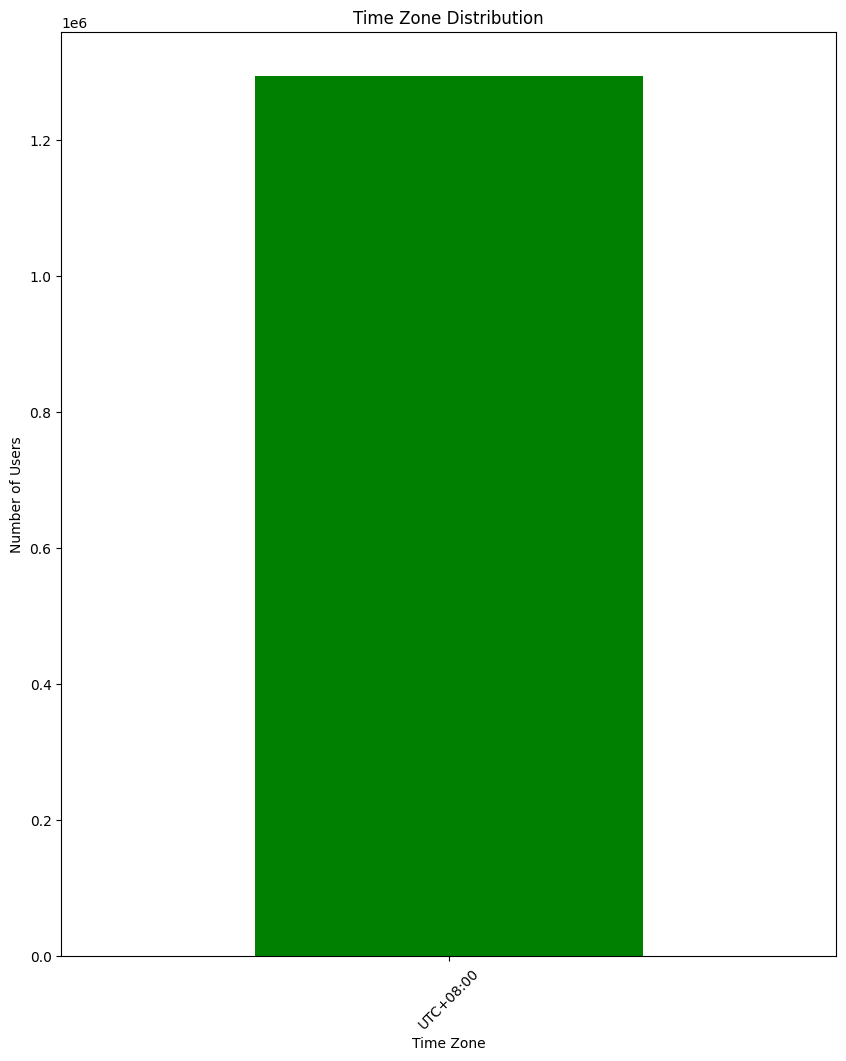

In [3]:
df['event_time'] = pd.to_datetime(df['event_time'])
# 提取时区信息
df['timezone'] = df['event_time'].dt.tz
# 统计时区分布
timezone_dist = df['timezone'].value_counts()

# 输出结果
print("时区分布：")
print(timezone_dist)

# 可视化分布
plt.figure(figsize=(10, 12))
timezone_dist.plot(kind='bar', color='green')
plt.title("Time Zone Distribution")
plt.xlabel("Time Zone")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

统计每个用户的提交次数，识别高活跃用户和低活跃用户。

In [ ]:
# 过滤出 `PushEvent` 记录
push_events = df[df['event_type'] == 'PushEvent']

# 按用户统计 PushEvent 出现的次数
user_push_counts = push_events['user_id'].value_counts().reset_index()
user_push_counts.columns = ['user_id', 'push_count']

# 识别高活跃用户（提交次数最多的前10名）和低活跃用户（提交次数最少的前10名）
high_active_users = user_push_counts.nlargest(10, 'push_count')
low_active_users = user_push_counts.nsmallest(10, 'push_count')

# 打印结果
print("高活跃用户（前10名）：")
print(high_active_users)

print("\n低活跃用户（前10名）：")
print(low_active_users)


分析使用最多的技术

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 加载数据
df = pd.read_csv("/Users/caolu/Desktop/merged_output.csv")
# 提取常见技术关键词

tech_keywords = ['Python', 'JavaScript', 'Java', 'C++', 'Data Science', 'AI']
df['bio_keywords'] = df['bio'].apply(lambda x: ', '.join([kw for kw in tech_keywords if pd.notna(x) and kw in x]))

tech_dist = df['bio_keywords'].value_counts()
print("用户技术关键词分布：")
print(tech_dist)

用户技术关键词分布：
bio_keywords
                                          218220
Python                                      2335
Java                                        2325
AI                                          2112
JavaScript, Java                            1532
Data Science                                 889
C++                                          652
Python, Java                                 514
Python, JavaScript, Java                     311
Python, C++                                  282
Java, C++                                    144
Python, Java, C++                            141
Python, AI                                   100
Python, Data Science                          85
Data Science, AI                              78
Python, JavaScript, Java, C++                 60
JavaScript, Java, C++                         57
Java, AI                                      20
Python, C++, AI                               15
C++, AI                                      

     Technology  Total_Count
1          Java         5177
0        Python         3907
2            AI         2388
3    JavaScript         1986
5           C++         1388
4  Data Science         1108


/var/folders/xs/9bqlm9cd7h7bsby1sbtnr7400000gn/T/ipykernel_78967/2465012951.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_Count", y="Technology", data=df, palette="coolwarm")


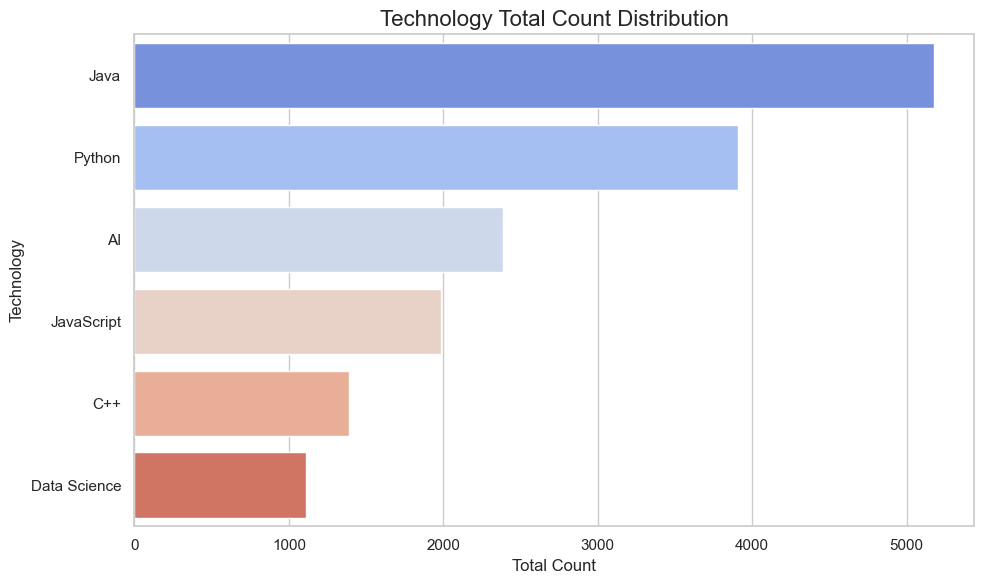

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 原始数据，手动或从文件读取
data = [
    ("Python", 2335),
    ("Java", 2325),
    ("AI", 2112),
    ("JavaScript, Java", 1532),
    ("Data Science", 889),
    ("C++", 652),
    ("Python, Java", 514),
    ("Python, JavaScript, Java", 311),
    ("Python, C++", 282),
    ("Java, C++", 144),
    ("Python, Java, C++", 141),
    ("Python, AI", 100),
    ("Python, Data Science", 85),
    ("Data Science, AI", 78),
    ("Python, JavaScript, Java, C++", 60),
    ("JavaScript, Java, C++", 57),
    ("Java, AI", 20),
    ("Python, C++, AI", 15),
    ("C++, AI", 13),
    ("Python, Java, AI", 12),
    ("Java, Data Science", 10),
    ("Python, Java, Data Science", 9),
    ("JavaScript, Java, AI", 9),
    ("Python, Data Science, AI", 9),
    ("Python, JavaScript, Java, Data Science", 8),
    ("Python, C++, Data Science", 6),
    ("Python, JavaScript, Java, AI", 6),
    ("Python, Java, C++, AI", 5),
    ("C++, Data Science", 4),
    ("Python, Java, C++, Data Science", 3),
    ("Python, Java, Data Science, AI", 3),
    ("Python, JavaScript, Java, C++, AI", 3),
    ("Java, Data Science, AI", 2),
    ("Java, C++, Data Science", 2),
    ("Java, C++, AI", 1),
]

# 转换为 DataFrame
df = pd.DataFrame(data, columns=["Technologies", "Count"])

# 分词统计
from collections import Counter

# 将每行的技术字段按逗号分开，计算总和
counter = Counter()
for _, row in df.iterrows():
    technologies = [tech.strip() for tech in row["Technologies"].split(",")]
    count = row["Count"]
    for tech in technologies:
        counter[tech] += count

# 转换为 DataFrame 排序
result = pd.DataFrame(counter.items(), columns=["Technology", "Total_Count"]).sort_values(by="Total_Count", ascending=False)

# 打印结果
print(result)


# 数据加载
data = {
    "Technology": ["Java", "Python", "AI", "JavaScript", "C++", "Data Science"],
    "Total_Count": [5177, 3907, 2388, 1986, 1388, 1108]
}
df = pd.DataFrame(data)

# 设置图表风格
sns.set(style="whitegrid")

# 创建柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x="Total_Count", y="Technology", data=df, palette="coolwarm")

# 添加标题和轴标签
plt.title("Technology Total Count Distribution", fontsize=16)
plt.xlabel("Total Count", fontsize=12)
plt.ylabel("Technology", fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()


分析公司

In [ ]:
company_dist = df['company'].value_counts()
print("主要公司分布：")
print(company_dist.head(10))

/var/folders/xs/9bqlm9cd7h7bsby1sbtnr7400000gn/T/ipykernel_78967/1093774522.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Company", data=df, palette="Blues_r")


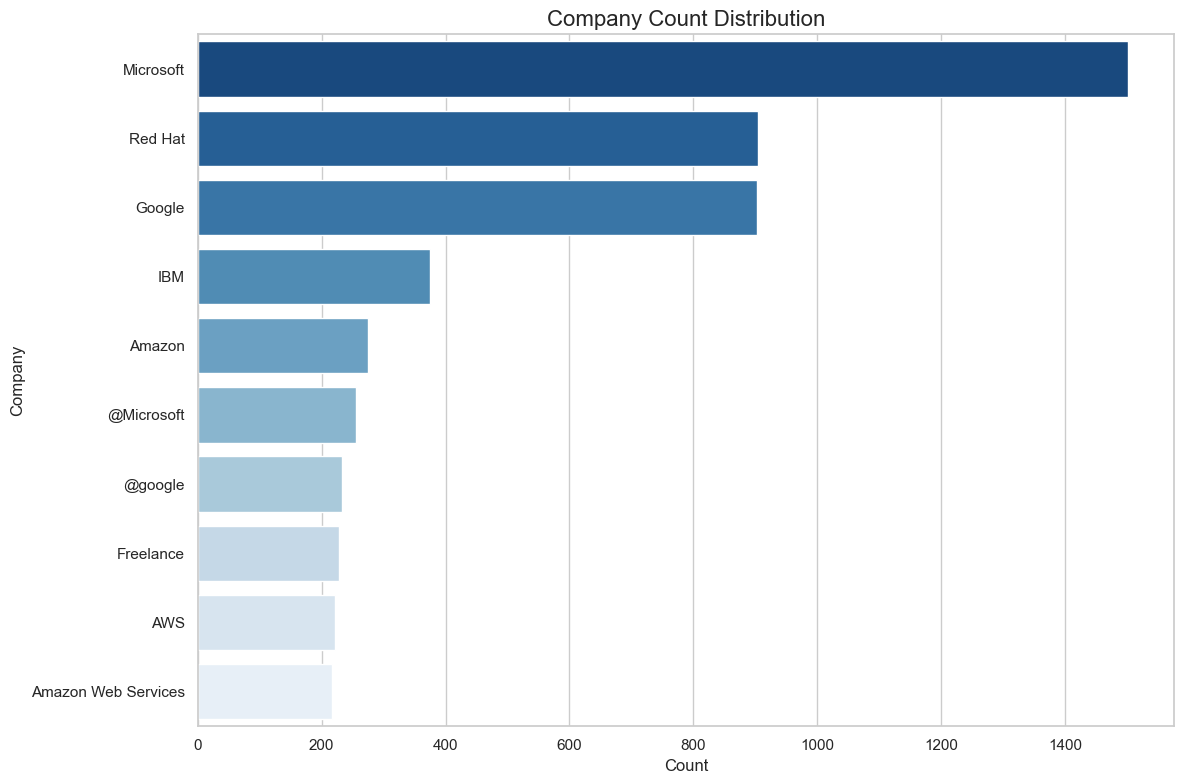

In [5]:
import seaborn as sns
# 数据加载
data = {
    "Company": [
        "Microsoft", "Red Hat", "Google", "IBM", "Amazon",
        "@Microsoft", "@google", "Freelance", "AWS", "Amazon Web Services"
    ],
    "Count": [1501, 905, 903, 374, 274, 256, 232, 228, 222, 216]
}
df = pd.DataFrame(data)

# 设置图表风格
sns.set(style="whitegrid")

# 创建柱状图
plt.figure(figsize=(12, 8))
sns.barplot(x="Count", y="Company", data=df, palette="Blues_r")

# 添加标题和轴标签
plt.title("Company Count Distribution", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Company", fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()